
1.Suppose you have a dataset containing information about house prices (dependent variable, denoted as price) and the size of the houses (in square feet, independent variable, denoted as size). You want to build a linear regression model to predict house prices based on their size. Write an R code snippet to perform the following steps:

* a) Load the dataset https://www.kaggle.com/competitions/house-prices- advanced-regression-techniques
* b)
* c) Fit a simple linear regression model with price as the dependent variable and size as the independent variable.
* d) Calculate the regression coefficients (slope and intercept).
* e) Plot the regression line along with the scatter plot of the data points.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
2,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
3,-114.56,33.69,17,720,174,333,117,1.6509,85700
4,-114.57,33.64,14,1501,337,515,226,3.1917,73400
5,-114.57,33.57,20,1454,326,624,262,1.9250,65500
6,-114.58,33.63,29,1387,236,671,239,3.3438,74000


[1] "longitude"          "latitude"           "housing_median_age"
[4] "total_rooms"        "total_bedrooms"     "population"        
[7] "households"         "median_income"      "median_house_value"

Intercept: 43980.63 
Slope: 42054.07 


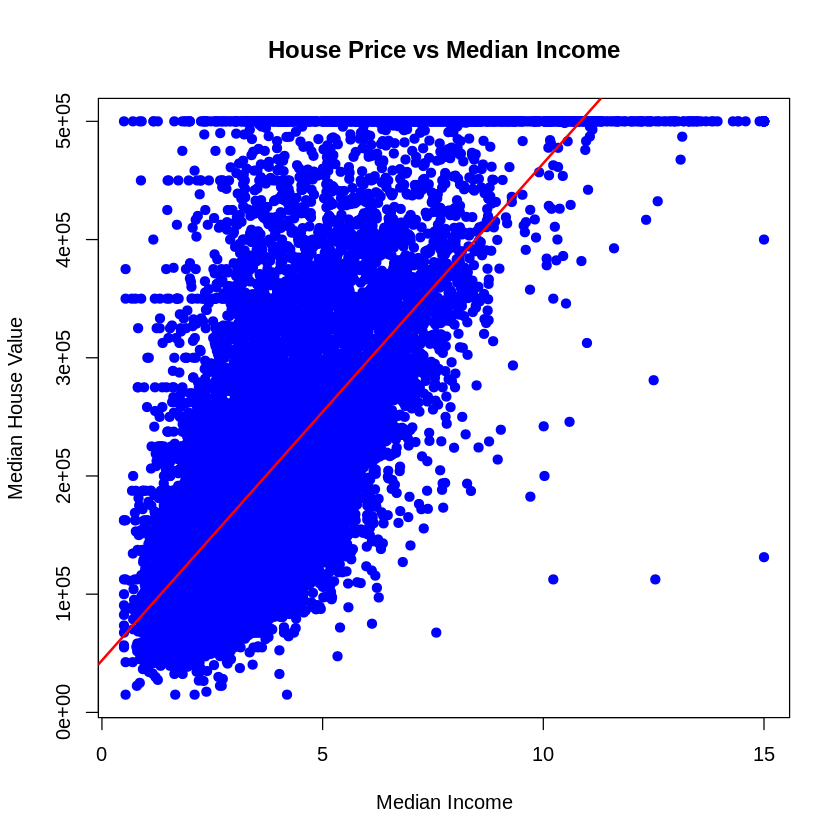

In [ ]:
house_data <- read.csv("/content/sample_data/california_housing_train.csv")
head(house_data)
names(house_data)

# Fit linear regression model
model <- lm(median_house_value ~ median_income, data = house_data)

#Slope and intercept
coefficients <- coef(model)
intercept <- coefficients[1]
slope <- coefficients[2]

cat("Intercept:", intercept, "\n")
cat("Slope:", slope, "\n")
#Plot scatter plot
plot(house_data$median_income, house_data$median_house_value,
     main = "House Price vs Median Income",
     xlab = "Median Income",
     ylab = "Median House Value",
     pch = 19, col = "blue")

abline(model, col = "red", lwd = 2)

2.Graph

a) Create an adjacency list representation for a given undirected graph
b) Implement a function to add an edge between two vertices in the graph.
c) Write an R function to perform DFS traversal on a graph starting froma specific vertex.
References https://r.igraph.org/index.html

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




IGRAPH 310bb4a UN-- 5 5 -- 
+ attr: name (v/c)
+ edges from 310bb4a (vertex names):
[1] A--B A--C B--D C--D D--E
IGRAPH 4878403 UN-- 6 7 -- 
+ attr: name (v/c)
+ edges from 4878403 (vertex names):
[1] A--B A--C B--D C--D D--E B--E A--F
DFS Traversal starting from A: A -> B -> D -> C -> E -> F 
DFS Traversal starting from C: C -> A -> B -> D -> E -> F 


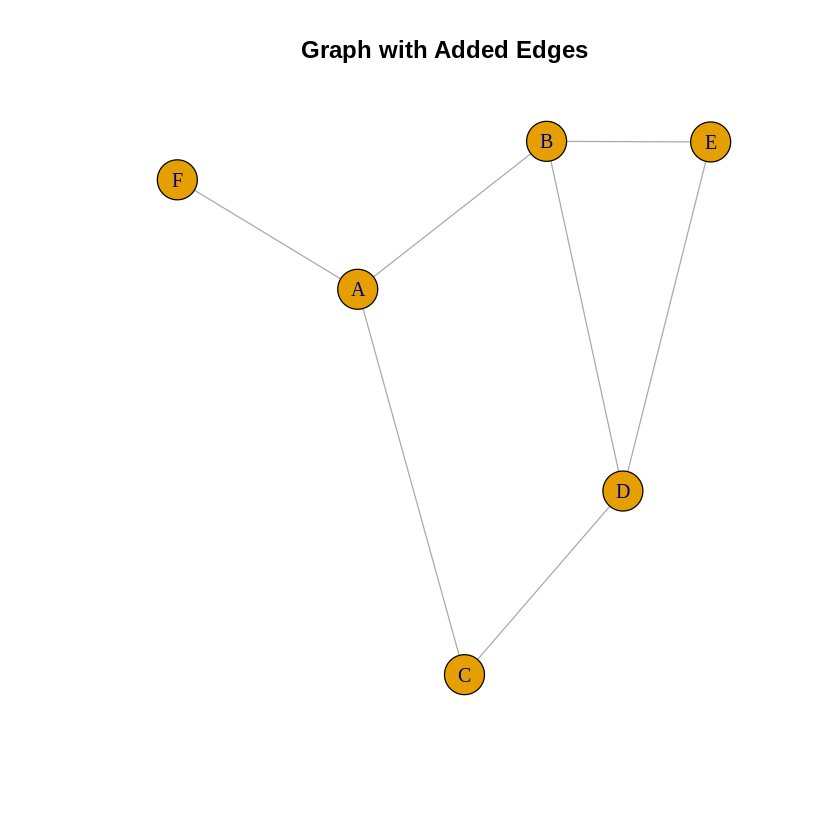

In [ ]:
install.packages("igraph")
library(igraph)

# Define the edges of the graph
# Each pair of numbers represents an edge between two vertices
edge_list <- matrix(c(
  "A", "B",
  "A", "C",
  "B", "D",
  "C", "D",
  "D", "E"
), ncol = 2, byrow = TRUE)

# Create the graph object from the edge list
# 'directed = FALSE' makes it an undirected graph
g <- graph_from_edgelist(edge_list, directed = FALSE)

# To view the graph's adjacency list representation
print(g)

# Add a single edge between vertex 'B' and vertex 'E'
g <- add_edges(g, c("B", "E"))

# Add a new vertex 'F' explicitly
g <- add_vertices(g, 1, name = "F")

# Now add the edge between 'A' and 'F'
g <- add_edges(g, c("A", "F"))


# Print the updated graph to see the new connections
print(g)

# You can also plot the graph to visualize the changes
plot(g, main="Graph with Added Edges")


# R function to perform and display DFS traversal
perform_dfs <- function(graph, start_vertex) {
  # Check if the start vertex exists in the graph
  if (!start_vertex %in% V(graph)$name) {
    return(paste("Error: Start vertex '", start_vertex, "' not found in the graph."))
  }

  # Perform the DFS traversal
  # The 'root' parameter specifies the starting vertex
  dfs_result <- dfs(graph, root = start_vertex, unreachable = FALSE)

  # Extract the names of the vertices in the order they were visited
  traversal_order <- V(graph)$name[dfs_result$order]

  # Return the traversal path
  return(traversal_order)
}

# Let's use our graph 'g' and start the traversal from vertex 'A'
dfs_path <- perform_dfs(g, start_vertex = "A")

# Print the result
cat("DFS Traversal starting from A:", paste(dfs_path, collapse = " -> "), "\n")

# Example of another traversal starting from 'C'
dfs_path_from_c <- perform_dfs(g, start_vertex = "C")
cat("DFS Traversal starting from C:", paste(dfs_path_from_c, collapse = " -> "), "\n")

3.Suppose we have a dataset of motor trend car road tests (mtcars). The dataset contains information about 32 car brands and 11 attributes. We want to investigate the correlation between the horsepower (hp) and miles per gallon (mpg). Perform a Pearson correlation test to analyze this relationship.

In [ ]:
# Load the mtcars dataset
data(mtcars)

# Perform Pearson correlation test between hp and mpg
correlation_result <- cor.test(mtcars$hp, mtcars$mpg, method = "pearson")

# Print the result
print(correlation_result)



	Pearson's product-moment correlation

data:  mtcars$hp and mtcars$mpg
t = -6.7424, df = 30, p-value = 1.788e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.8852686 -0.5860994
sample estimates:
       cor 
-0.7761684 



4.Suppose we have a dataset of motor trend car road tests (mtcars). The
dataset contains information about 32 car brands and 11 attributes. We
want to investigate whether there are any significant variations in the
average displacement (disp) across different gear types (gear). Perform
a one-way ANOVA test to analyze this

In [ ]:
# Load the dataset
data("mtcars")

# Convert 'gear' to a factor (since it's categorical)
mtcars$gear <- as.factor(mtcars$gear)

# Perform One-Way ANOVA
anova_result <- aov(disp ~ gear, data = mtcars)

# Display the ANOVA summary table
summary(anova_result)

            Df Sum Sq Mean Sq F value   Pr(>F)    
gear         2 280221  140110   20.73 2.56e-06 ***
Residuals   29 195964    6757                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

5.We want to investigate the behavior of the total positive COVID-19 cases weekly from 22 January 2020 to 15 December 2020 in India. Perform the following tasks:
Data set link https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv

a) Univariate Time Series Analysis:
i. Create a time series object for the total positive COVID-19 cases
ii. Visualize the time series data using a line chart.
b) Multivariate Time Series Analysis:
i. Also, consider the total deaths from COVID-19 during the same period.
ii. Create a multivariate time series object that includes both the total positive cases and total deaths. iii. Plot both series on a single chart.
c) Time Series Forecasting:
i. Use the auto.arima() function from the forecast library to fit an ARIMA model to the total positive cases.
ii. Forecast the next 5 data points.
iii. Plot the forecasted values.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘tinytest’, ‘pkgKitten’, ‘reticulate’, ‘slam’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘iterators’, ‘quadprog’, ‘quantmod’, ‘foreach’, ‘x13binary’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘forecTheta’, ‘rticles’, ‘seasonal’, ‘uroot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘packag

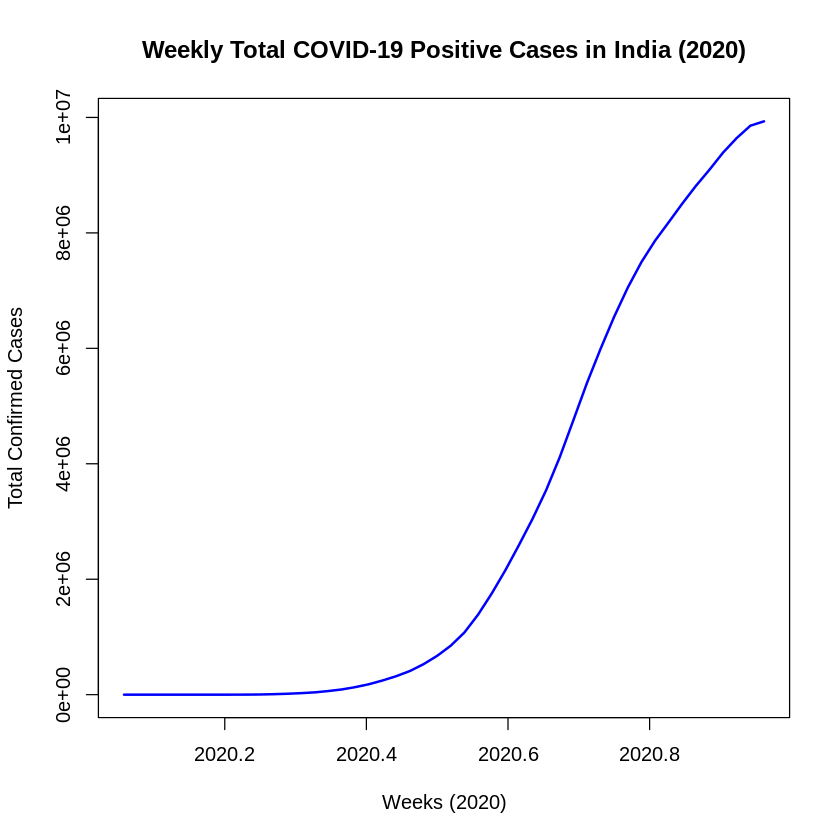

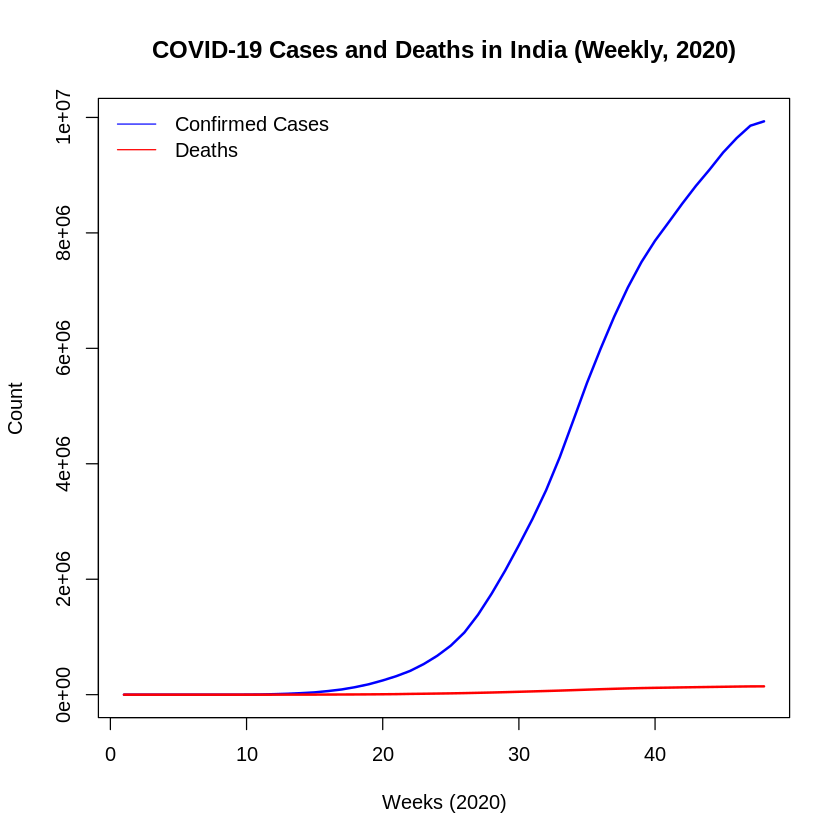

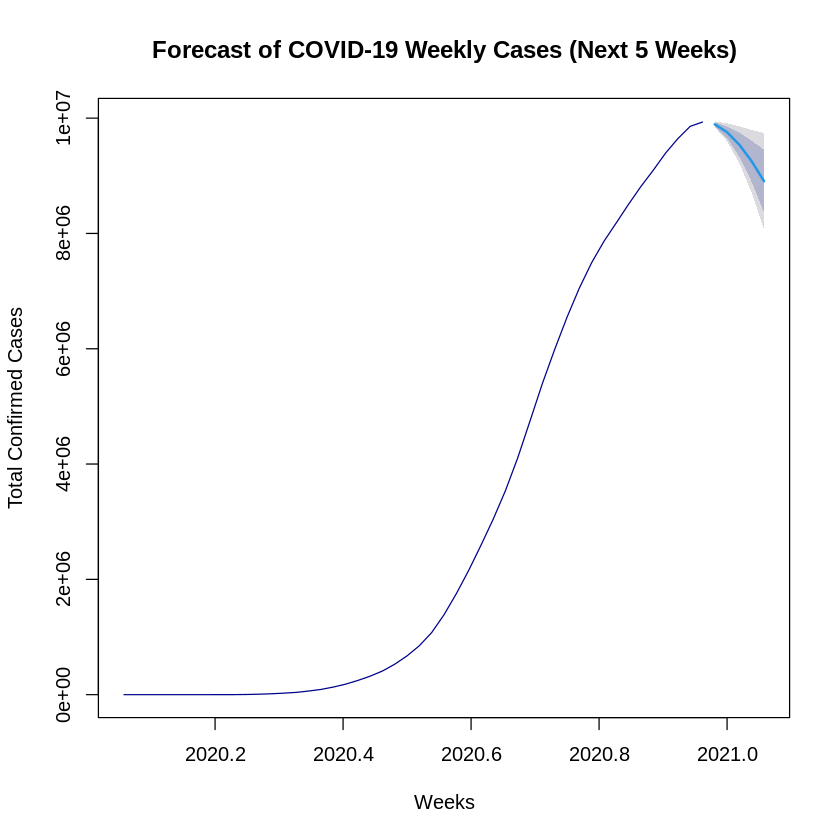

In [ ]:
install.packages("Rcpp")
install.packages("RcppArmadillo", dependencies = TRUE)
install.packages("forecast", dependencies = TRUE)
install.packages("ggplot2")
install.packages("dplyr")
#install.packages(c("forecast", "ggplot2", "dplyr"))
library(forecast)
library(ggplot2)
library(dplyr)

#Load the dataset from GitHub
url <- "https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv"
covid_data <- read.csv(url)

#Filter data for India and the required date range
covid_india <- covid_data %>%
  filter(Country.Region == "India" & Date >= "2020-01-22" & Date <= "2020-12-15")

# Step 3: Aggregate weekly total confirmed cases and deaths
covid_india$Date <- as.Date(covid_india$Date)
covid_weekly <- covid_india %>%
  group_by(week = format(Date, "%Y-%U")) %>%
  summarise(Total_Cases = max(Confirmed), Total_Deaths = max(Deaths))

# a) UNIVARIATE TIME SERIES ANALYSIS
# i. Create time series object for total positive cases
cases_ts <- ts(covid_weekly$Total_Cases, frequency = 52, start = c(2020, 4))

# ii. Visualize the time series data
plot(cases_ts,
     main = "Weekly Total COVID-19 Positive Cases in India (2020)",
     xlab = "Weeks (2020)", ylab = "Total Confirmed Cases",
     col = "blue", lwd = 2)

# b) MULTIVARIATE TIME SERIES ANALYSIS
# ii. Create multivariate time series object
multi_ts <- ts(cbind(covid_weekly$Total_Cases, covid_weekly$Total_Deaths),
               frequency = 52, start = c(2020, 4))

# iii. Plot both series together
matplot(multi_ts, type = "l", lty = 1, col = c("blue", "red"), lwd = 2,
        xlab = "Weeks (2020)", ylab = "Count",
        main = "COVID-19 Cases and Deaths in India (Weekly, 2020)")
legend("topleft", legend = c("Confirmed Cases", "Deaths"),
       col = c("blue", "red"), lty = 1, bty = "n")

#c) TIME SERIES FORECASTING
# i. Fit ARIMA model using auto.arima()
model_arima <- auto.arima(cases_ts)

# ii. Forecast next 5 data points
forecast_result <- forecast(model_arima, h = 5)

# iii. Plot forecasted values
plot(forecast_result,
     main = "Forecast of COVID-19 Weekly Cases (Next 5 Weeks)",
     xlab = "Weeks", ylab = "Total Confirmed Cases",
     col = "darkblue")



6.The Boston data set comes from the real estate industry in Boston (US). This is a regression problem. The data has 506 rows and 14 columns.

a. Perform data exploration and visualization using R programing.
b. Perform Regression analysis on the dataset.
c. Predict the median value of owner occupied homes.
https://www.kaggle.com/code/prasadperera/the-boston-housing-dat

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


crim      zn   indus    chas     nox      rm     age     dis     rad     tax 
      0       0       0       0       0       0       0       0       0       0 
ptratio   black   lstat    medv 
      0       0       0       0

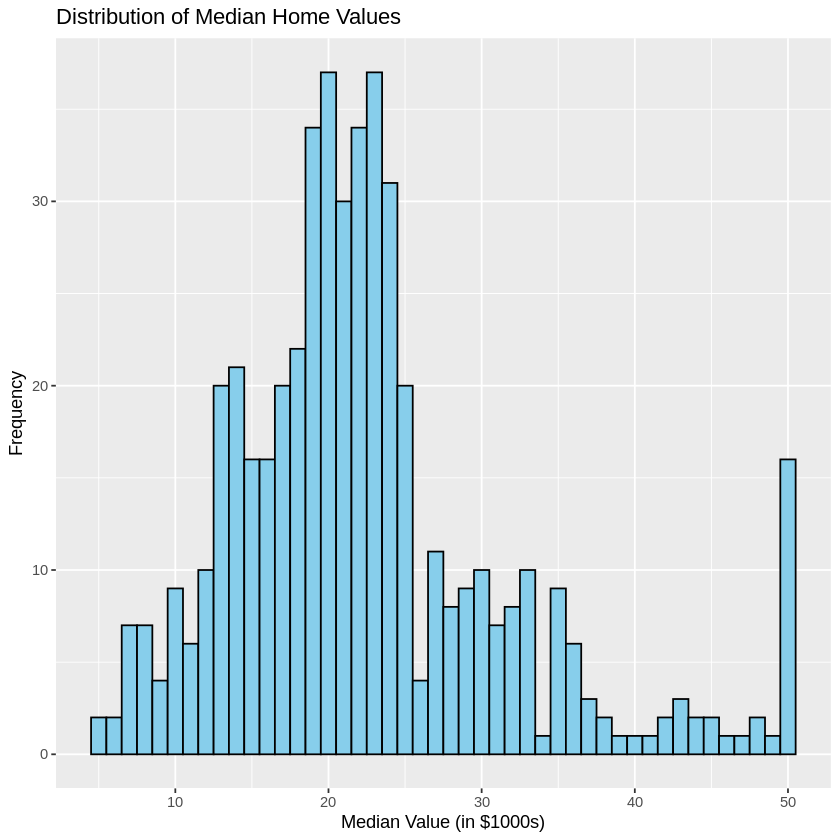

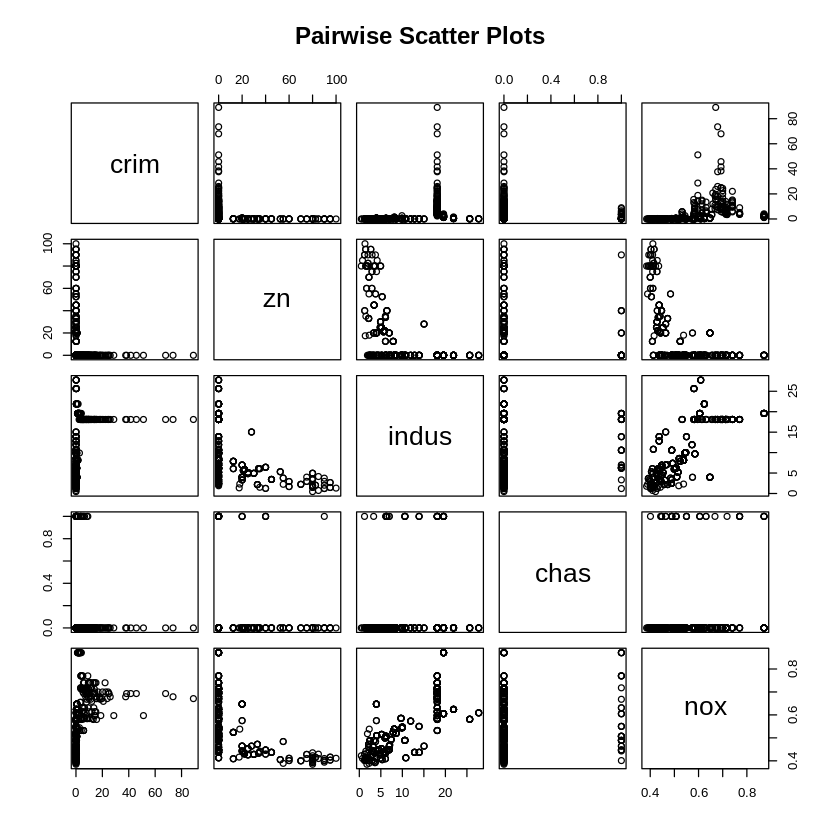

`geom_smooth()` using formula = 'y ~ x'


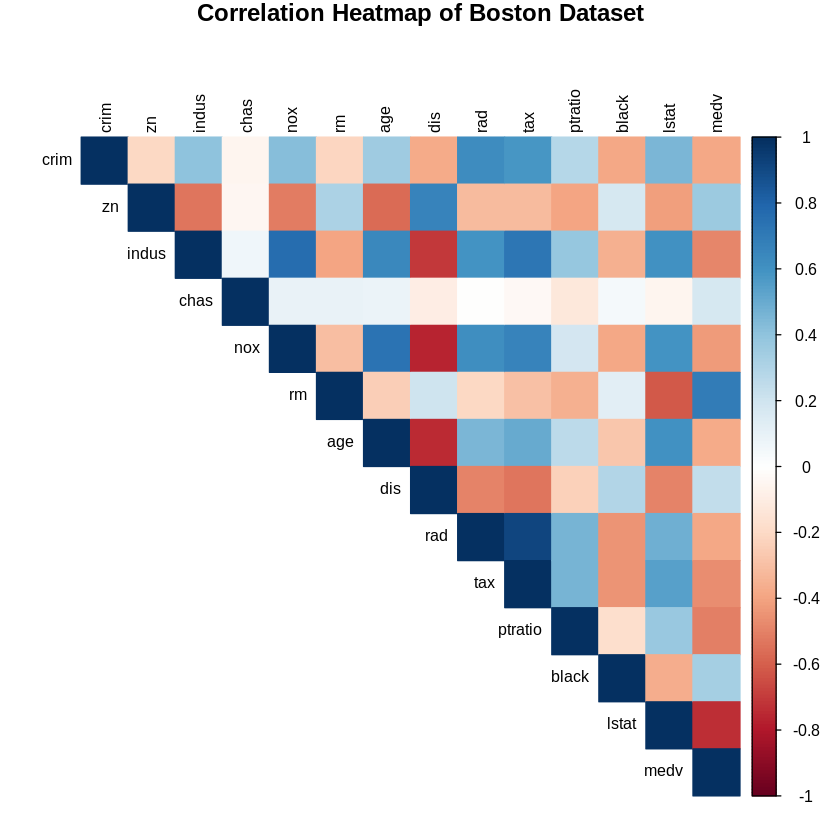

Warning message in summary.lm(model):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = target ~ ., data = Boston)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.808e-15 -1.771e-16 -4.940e-17  7.400e-17  2.304e-14 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  6.979e-15  1.218e-15  5.730e+00 1.76e-08 ***
crim        -3.068e-17  7.548e-18 -4.065e+00 5.60e-05 ***
zn           3.744e-18  3.155e-18  1.187e+00 0.235940    
indus        1.197e-17  1.397e-17  8.570e-01 0.391995    
chas         6.127e-16  1.977e-16  3.100e+00 0.002048 ** 
nox         -3.441e-15  8.867e-16 -3.881e+00 0.000118 ***
rm           4.368e-16  1.027e-16  4.255e+00 2.50e-05 ***
age         -1.092e-18  3.001e-18 -3.640e-01 0.716102    
dis         -2.467e-16  4.777e-17 -5.165e+00 3.51e-07 ***
rad          5.935e-17  1.540e-17  3.855e+00 0.000131 ***
tax         -2.406e-18  8.636e-19 -2.786e+00 0.005549 ** 
ptratio     -1.894e-16  3.128e-17 -6.053e+00 2.83e-09 ***
black        1.363e-18  6.176e-19  2.207e+00 0.027784 *  
ls

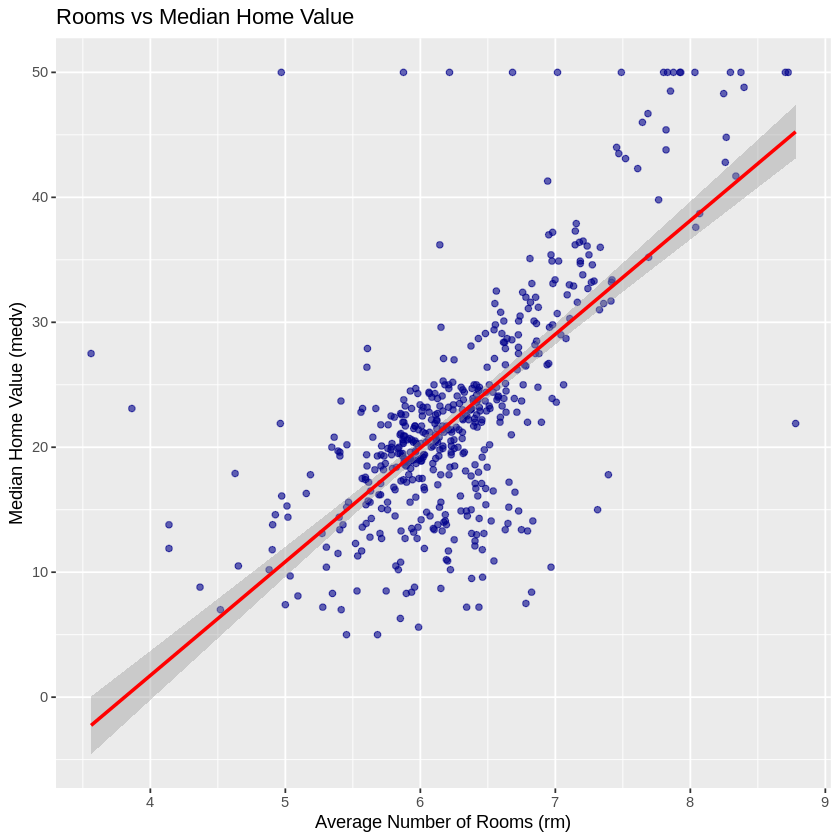

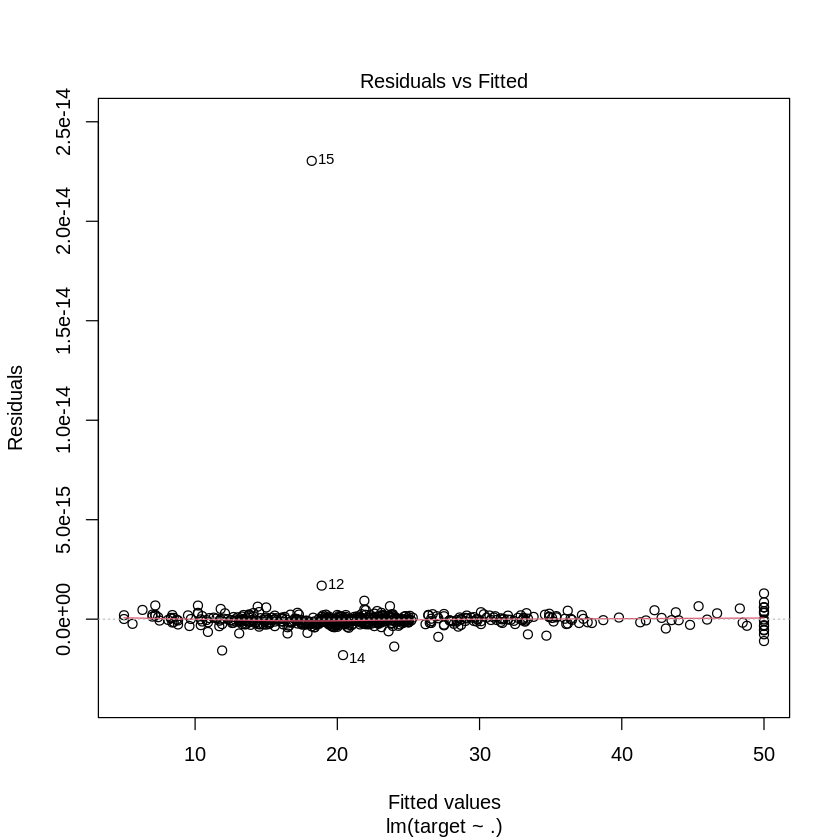

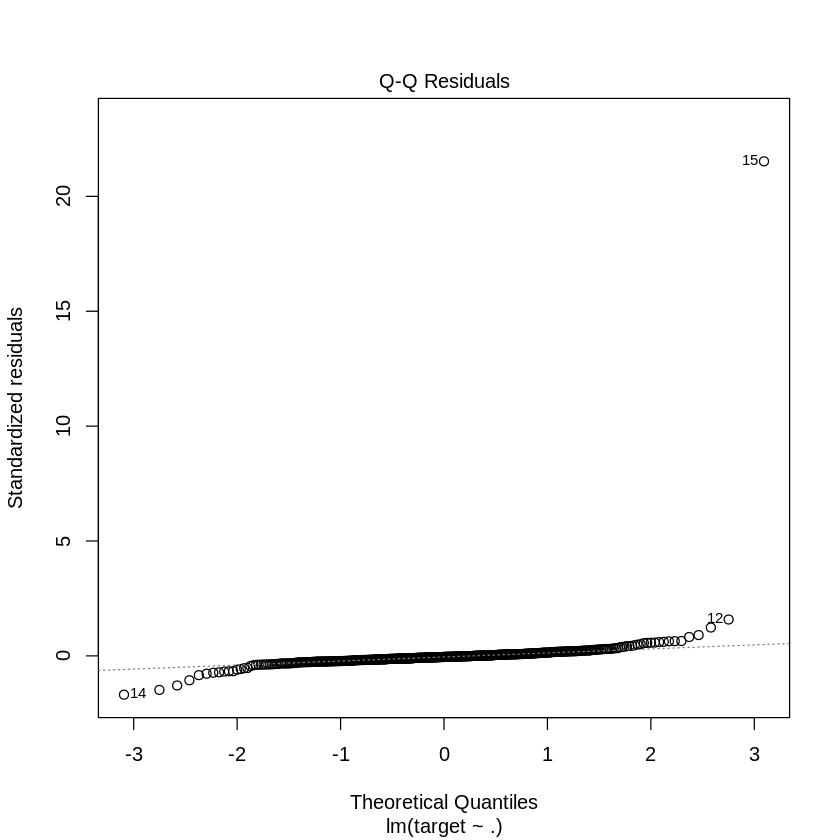

ERROR: Error in eval(predvars, data, env): object 'medv' not found


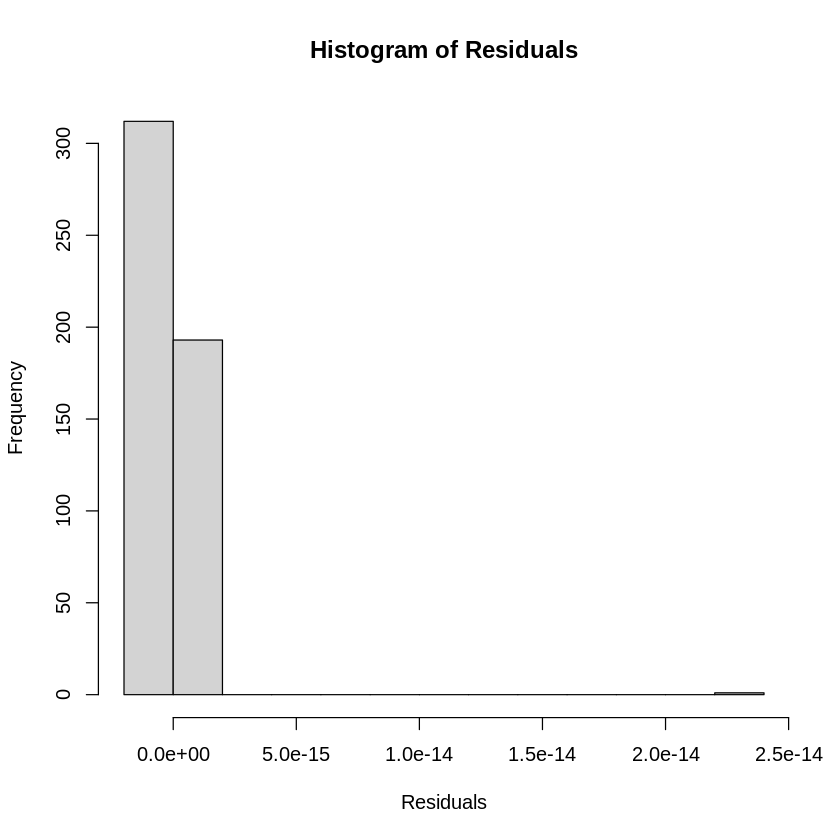

In [ ]:
# Core packages for data manipulation, visualization, and modeling
install.packages("ggplot2")      # For plots
install.packages("GGally")       # For ggpairs plots (pairwise relationships)
install.packages("corrplot")     # For correlation matrix plots
install.packages("dplyr")        # For data manipulation
install.packages("tidyr")        # For data tidying
install.packages("Metrics")      # For regression evaluation (e.g., RMSE, MAE)
install.packages("car")          # For VIF/multicollinearity check
# Install and load necessary packages
install.packages("MASS")
library(MASS)

# Load the Boston dataset
data("Boston")
# Display the first few rows
head(Boston)

# Summary statistics
summary(Boston)

# Structure of the dataset
str(Boston)
# Check for missing values
colSums(is.na(Boston))

# Load ggplot2 for visualization

library(ggplot2)

# Histogram of median value of owner-occupied homes
ggplot(Boston, aes(x = medv)) +
  geom_histogram(binwidth = 1, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Median Home Values", x = "Median Value (in $1000s)", y = "Frequency")

# Pairwise scatter plots
pairs(Boston[, 1:5], main = "Pairwise Scatter Plots")

library(corrplot)

# Calculate correlation matrix
cor_matrix <- cor(Boston)

# Plot correlation heatmap
corrplot(cor_matrix, method = "color", type = "upper", tl.cex = 0.8, tl.col = "black",
         title = "Correlation Heatmap of Boston Dataset", mar = c(0,0,1,0))
ggplot(Boston, aes(x = rm, y = medv)) +
  geom_point(alpha = 0.6, color = "darkblue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Rooms vs Median Home Value", x = "Average Number of Rooms (rm)", y = "Median Home Value (medv)")



# Define the target variable and predictors
target <- Boston$medv
predictors <- Boston[, -14]  # Exclude the target variable
# Fit the linear regression model
model <- lm(target ~ ., data = Boston)

# Display the model summary
summary(model)
# Residuals vs Fitted plot
plot(model, which = 1)

# Q-Q plot for residuals
plot(model, which = 2)

# Residuals histogram
hist(residuals(model), main = "Histogram of Residuals", xlab = "Residuals")
# New data point (example)
new_data <- data.frame(
  crim = 0.1, zn = 0, indus = 6.5, chas = 0, nox = 0.5,
  rm = 6, age = 40, dis = 4, rad = 5, tax = 300,
  ptratio = 15, b = 380, lstat = 5, black = 396.90
)
# Predict using the trained model
predicted_value <- predict(model, newdata = new_data)
predicted_value